In [22]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings

# Ignore warnings for clean output
warnings.filterwarnings("ignore")

In [23]:
# Load the dataset
df = pd.read_csv("data.csv")
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [24]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [26]:
# Data Preprocessing
# Convert 'pickup_datetime' to datetime format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [28]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [32]:
print("\nDataset Description:")
df.describe()


Dataset Description:


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


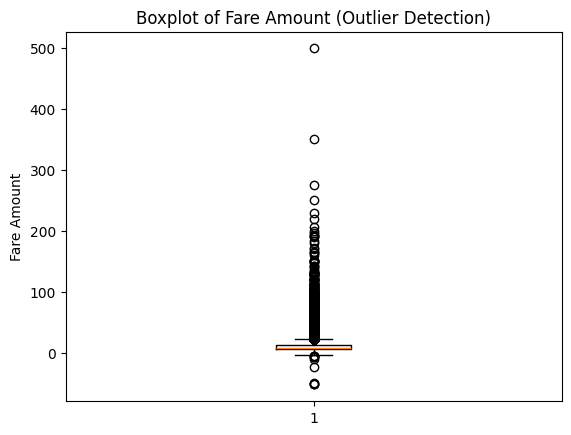

In [33]:
# Identify and Remove Outliers
# Plotting boxplot to visualize outliers in 'fare_amount'
plt.boxplot(df['fare_amount'])
plt.title("Boxplot of Fare Amount (Outlier Detection)")
plt.ylabel("Fare Amount")
plt.show()

In [34]:
# Removing outliers based on fare amount (1.5 IQR rule)
# q1 = df["fare_amount"].quantile(0.25)
# q3 = df["fare_amount"].quantile(0.75)
# iqr = q3 - q1
# lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr
# df = df[(df["fare_amount"] >= lower_bound) & (df["fare_amount"] <= upper_bound)]

# print("\nData shape after outlier removal:", df.shape)
q_low = df["fare_amount"].quantile(0.25)
q_hi  = df["fare_amount"].quantile(0.75)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

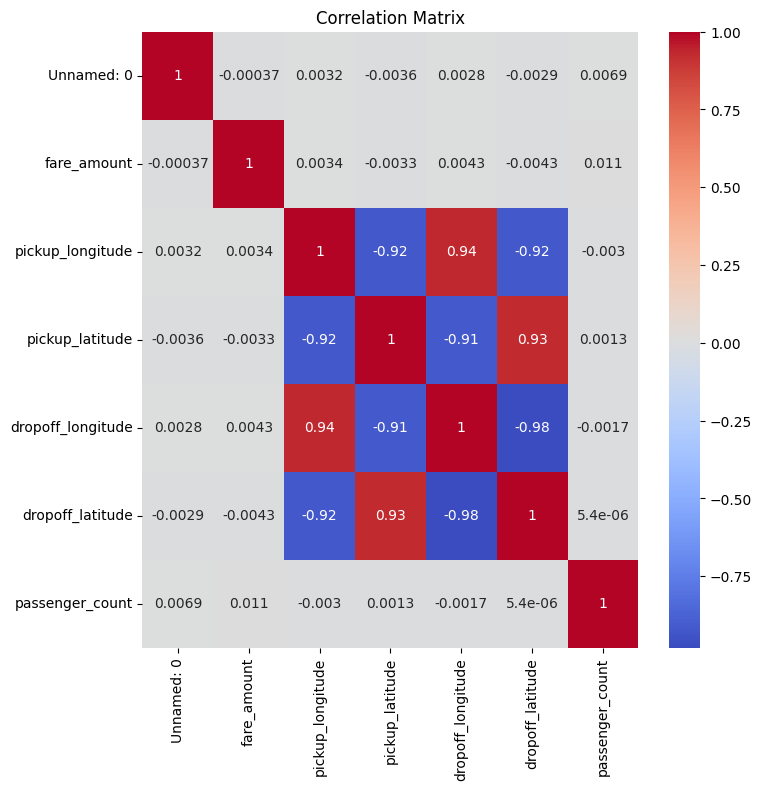

In [35]:
# Keep only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Matrix
# Check correlation between features
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [36]:
# Splitting the Data
# Define features and target variable
X = df.drop("fare_amount", axis=1)
y = df["fare_amount"]

In [37]:
X['pickup_datetime'] = pd.to_numeric(X['pickup_datetime'])

In [38]:
X = X.loc[:, X.columns.str.contains('^Unnamed')]

In [39]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets.")


Data split into training and testing sets.


In [40]:
# Linear Regression Model
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
predict_lr = lrmodel.predict(x_test)

In [41]:
# Evaluation metrics for Linear Regression
lr_rmse = np.sqrt(mean_squared_error(y_test, predict_lr))
lr_r2 = r2_score(y_test, predict_lr)
print(f"\nLinear Regression - RMSE: {lr_rmse:.2f}, R^2: {lr_r2:.2f}")


Linear Regression - RMSE: 1.72, R^2: -0.00


In [43]:
# Random Forest Regression Model
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=42)
rfrmodel.fit(x_train, y_train)
predict_rfr = rfrmodel.predict(x_test)

In [44]:
# Evaluation metrics for Random Forest Regression
rfr_rmse = np.sqrt(mean_squared_error(y_test, predict_rfr))
rfr_r2 = r2_score(y_test, predict_rfr)
rfr_mae = mean_absolute_error(y_test, predict_rfr)
print(f"Random Forest - RMSE: {rfr_rmse:.2f}, R^2: {rfr_r2:.2f}, MAE: {rfr_mae:.2f}")

Random Forest - RMSE: 2.08, R^2: -0.47, MAE: 1.70
